In [1]:
# load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# importing the data files
transactiondata = pd.read_excel("QVI_transaction_data.xlsx")
customerdata = pd.read_csv("QVI_purchase_behaviour.csv")

Exploratory data analysis

In [3]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transactiondata.shape

(264836, 8)

In [5]:
transactiondata.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
# Examining the transaction data
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


It was observed that the date column is in an integer format instead of date format

In [7]:
# Convert the DATE column to a date format
transactiondata['DATE'] = pd.to_datetime(transactiondata['DATE'], unit='D', origin='1899-12-30')
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


I would like to check that if I'm looking at the right products by examining PROD_NAME.

In [8]:
# Examining the PROD_NAME column
transactiondata["PROD_NAME"].nunique()


114

In [9]:
pd.unique(transactiondata["PROD_NAME"])

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [10]:
# Extract weights out of 'PROD_NAME'
transactiondata['PACK_WEIGHT'] = transactiondata['PROD_NAME'].str.extract("(\d+)")
transactiondata['PACK_WEIGHT'] = pd.to_numeric(transactiondata['PACK_WEIGHT'])
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [11]:
# Removing digits
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].replace('\d\w*', '', regex=True).str.strip()
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [12]:
# Removing special characters
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].replace('[&/]', '', regex=True).str.strip()
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [13]:
# Create one giant string and apply 'word_tokenize' to separate the words

# load Text analysis packages
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

cleanProdName = transactiondata['PROD_NAME']
string = ''.join(cleanProdName)
productsWord = word_tokenize(string)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe

wordFrequency = fdist(productsWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [15]:
freq_df

,Word,Frequency
8,Chips,32685
6,Crinkle,23960
26,Corn,22063
21,Salt,21819
7,Cut,20754
...,...,...
1817,MedGrnWves,7
1804,FriedChickenFrench,7
2101,FrchOninSunbites,6
2068,BologneseSnbts,5


There are salsa products in the dataset but we are only interested in the chips 
category, so let's remove these.


In [16]:
# Remove salsa products by dropping rows with salsa word in PROD_NAME

transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(lambda x: x.lower())
transactiondata = transactiondata[~transactiondata['PROD_NAME'].str.contains("salsa")]
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(lambda x: x.title())

Next is to check summary statistics such as mean, min and max 
values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns

Filter the dataset to find the outlier


In [17]:
# Value counts of PROD_QTY

transactiondata['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.

In [18]:
transactiondata.loc[transactiondata['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [19]:
# Check if the customer has had other transactions
transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


the customer only made two transaction as seen above

In [20]:
# Remove the customer data based on the loyalty card number
transactiondata.drop(transactiondata.index[transactiondata['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [21]:
# check if there's null value
transactiondata.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_WEIGHT       0
dtype: int64

Next is to examine the number of transaction lines over time to see if there are any obvious data issues such as missing data.


In [22]:
# Count the number of transactions by date
transactiondata['DATE'].nunique()

364

There's only 364 rows, meaning only 364 dates which indicates a missing date. 

In [23]:
# Look for the missing date 

pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transactiondata['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We have a missing date on Christmas Day as shon above. This makes sense because most retail stores are closed that day.

In [25]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(transactiondata, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [26]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [72]:
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [27]:
c = a + b
c.fillna(0, inplace = True)
c.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [28]:
c.index.name = 'DATE'
c.head() 

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


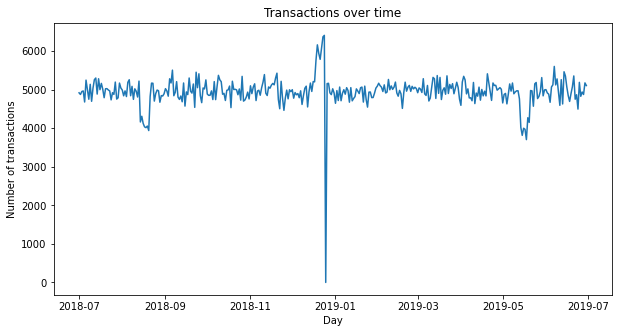

In [32]:

# Plot transactions over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(c.index, c['TOT_SALES'])

import datetime
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

plt.title("Transactions over time")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

plt.show()

We can see that there is an increase in purchases in December and a break in late 
December.

In [33]:
# Let's look at the December month only

decembersales = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
decembersales.head()

,TOT_SALES
DATE,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

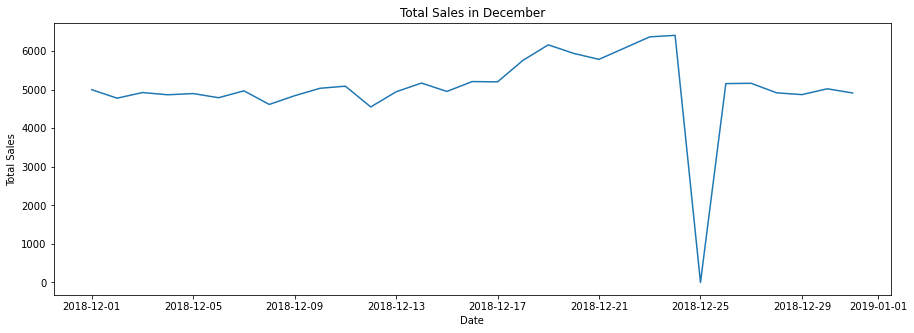

In [46]:
plt.figure(figsize = (15, 5))
plt.plot(decembersales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

We can see that the increase in sales occurs in the lead-up to Christmas and that 
there are zero sales on Christmas day itself. This is due to shops being closed on 
Christmas day

In [49]:
# check the unique value for the pack size
transactiondata['PACK_WEIGHT'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

In [50]:
transactiondata['PACK_WEIGHT'].nunique()

20

There are 20 unique values for the sizes

Now let's plot a histogram of PACK_WEIGHT since we know that it is a categorical 
variable and not a continuous variable even though it is numeric.

In [69]:
transactiondata['PACK_WEIGHT'].value_counts().sort_values(ascending = False)

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_WEIGHT, dtype: int64

Text(0.5, 1.0, 'Number of transactions by pack weight')

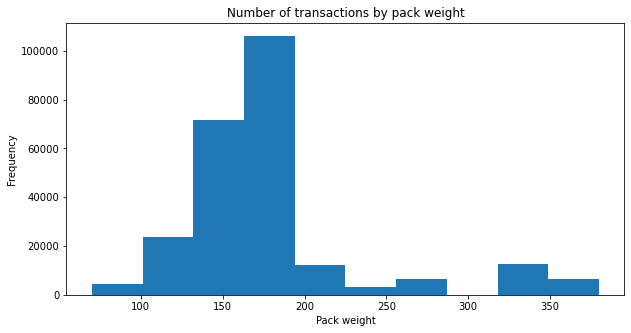

In [52]:
plt.figure(figsize = (10, 5))
plt.hist(transactiondata['PACK_WEIGHT'])     
plt.xlabel('Pack weight')
plt.ylabel('Frequency')
plt.title('Number of transactions by pack weight')

In [54]:
# create new column called BRAND
part = transactiondata['PROD_NAME'].str.partition()
transactiondata['BRAND'] = part[0]
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle


In [55]:
# Checking brands
transactiondata['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [57]:
# Clean brand names
transactiondata['BRAND'].replace('Ncc', 'Natural', inplace = True)
transactiondata['BRAND'].replace('Smith', 'Smiths', inplace = True)
transactiondata['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactiondata['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transactiondata['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transactiondata['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transactiondata['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactiondata['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transactiondata['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [58]:
# Which brand had the most sales?

transactiondata.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Natural           42318.0
Woolworths        41059.1
Cheezels          40029.9
Ccs               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

It was observed that the brand Kettle has the highest total sales

In [59]:
customerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [61]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [62]:
# How many unique lifestages?

customerdata['LIFESTAGE'].nunique()

7

In [64]:
# How many unique lifestages?

customerdata['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [65]:
# Value counts for lifestages

customerdata['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [ ]:

# # Create a new dataframe which contains the life stage count

# count = pd.DataFrame(customerdata['LIFESTAGE'].value_counts().sort_values(ascending = False))
# count

In [ ]:

count.rename(columns = {'LIFESTAGE': 'Count'}, inplace = True)
count.index.name = 'Count'
# count 

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

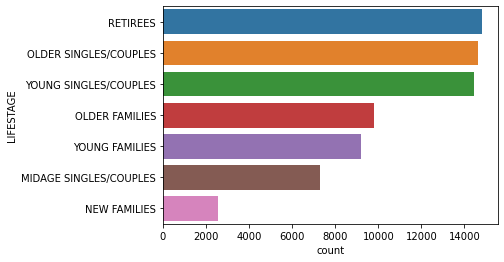

In [82]:
sns.countplot(y = customerdata['LIFESTAGE'], order = customerdata['LIFESTAGE'].value_counts().index)

In [66]:
# How many unique customer?

customerdata['PREMIUM_CUSTOMER'].nunique()

3

In [67]:
# How many unique customer?

customerdata['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [68]:
# Value counts for customers

customerdata['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PREMIUM_CUSTOMER'>

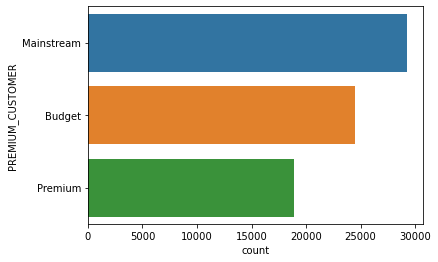

In [84]:
sns.countplot(y = customerdata['PREMIUM_CUSTOMER'], order = customerdata['PREMIUM_CUSTOMER'].value_counts().index)

In [85]:
# Merge transaction data to customer data
mergedData = pd.merge(transactiondata, customerdata)
mergedData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [86]:
# check if there's null value in the merged data
mergedData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_WEIGHT         0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [87]:
mergedData.to_csv("Customer and Transaction data.csv", index=False)

Great, there are no nulls! So all our customers in the transaction data has been 
accounted for in the customer dataset.

## Data analysis on customer segments 
Now that the data is ready for analysis, we can define some metrics of interest to 
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment



We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction 
to understand what proportion of their grocery spend is on chips 
- Proportion of customers in each customer segment overall to compare against the 
mix of customers who purchase chips

In [92]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
Total_sales = pd.DataFrame(mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
Total_sales.rename(columns = {'TOT_SALES': 'Sales by customer&lifestage'}, inplace = True)
Total_sales.sort_values(by = 'Sales by customer&lifestage', ascending = False, inplace = True)
Total_sales

Sales by customer&lifestage
PREMIUM_CUSTOMER LIFESTAGE                                          
Budget           OLDER FAMILIES                            156863.75
Mainstream       YOUNG SINGLES/COUPLES                     147582.20
                 RETIREES                                  145168.95
Budget           YOUNG FAMILIES                            129717.95
                 OLDER SINGLES/COUPLES                     127833.60
Mainstream       OLDER SINGLES/COUPLES                     124648.50
Premium          OLDER SINGLES/COUPLES                     123537.55
Budget           RETIREES                                  105916.30
Mainstream       OLDER FAMILIES                             96413.55
Premium          RETIREES                                   91296.65
Mainstream       YOUNG FAMILIES                             86338.25
                 MIDAGE SINGLES/COUPLES                     84734.25
Premium          YOUNG FAMILIES                             78571.70
                 OLDER FAMILIES                             75242.60
Budget           YOUNG SINGLES/COUPLES                      57122.10
Premium          MIDAGE SINGLES/COUPLES                     54443.85
                 YOUNG SINGLES/COUPLES                      39052.30
Budget           MIDAGE SINGLES/COUPLES                     33345.70
                 NEW FAMILIES                               20607.45
Mainstream       NEW FAMILIES                               15979.70
Premium          NEW FAMILIES                               10760.80

'older families' in the class 'budget' spend the most on ships followed by Mainstream - young 
singles/couples, and Mainstream - retirees

In [93]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

no_customers = pd.DataFrame(mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
no_customers.rename(columns = {'LYLTY_CARD_NBR': 'Individual customer'}, inplace = True)
no_customers.sort_values(by = 'Individual customer', ascending = False).head(10)

Individual customer
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358
                 OLDER SINGLES/COUPLES                 4858
Budget           OLDER SINGLES/COUPLES                 4849
Premium          OLDER SINGLES/COUPLES                 4682
Budget           OLDER FAMILIES                        4611
                 RETIREES                              4385
                 YOUNG FAMILIES                        3953
Premium          RETIREES                              3812
Budget           YOUNG SINGLES/COUPLES                 3647

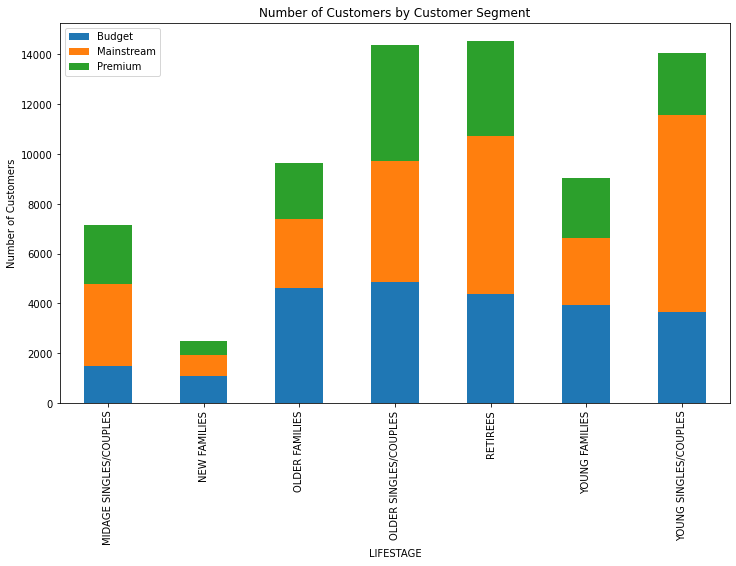

In [94]:
no_customersPlot = pd.DataFrame(mergedData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
no_customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but 
this is not a major driver for the Budget - Older families segment.




Higher sales may also be driven by more units of chips being bought per customer. 

In [96]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units_per_customer = pd.DataFrame(avg_units_per_customer, columns = {'Average Unit per Customer'})
avg_units_per_customer.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


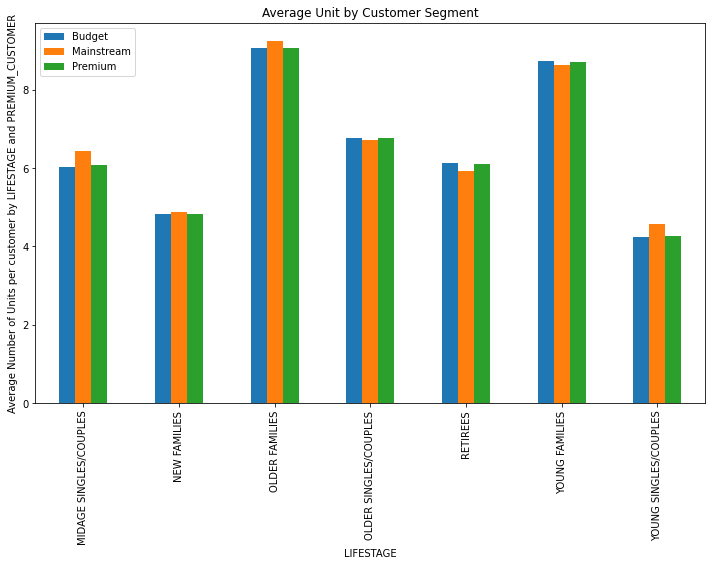

In [103]:
# Visualise 

avg_units_per_customerPlot = pd.DataFrame(mergedData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / mergedData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avg_units_per_customerPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units per customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older families and young families in general buy more chips per customer

In [115]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / mergedData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price_per_unit = pd.DataFrame(avg_price_per_unit, columns = {'Average price per unit'})
avg_price_per_unit.sort_values(by = 'Average price per unit', ascending = False).head()


Average price per unit
PREMIUM_CUSTOMER LIFESTAGE                                     
Mainstream       YOUNG SINGLES/COUPLES                 4.074043
                 MIDAGE SINGLES/COUPLES                3.994449
                 NEW FAMILIES                          3.935887
Budget           RETIREES                              3.932731
                 NEW FAMILIES                          3.931969

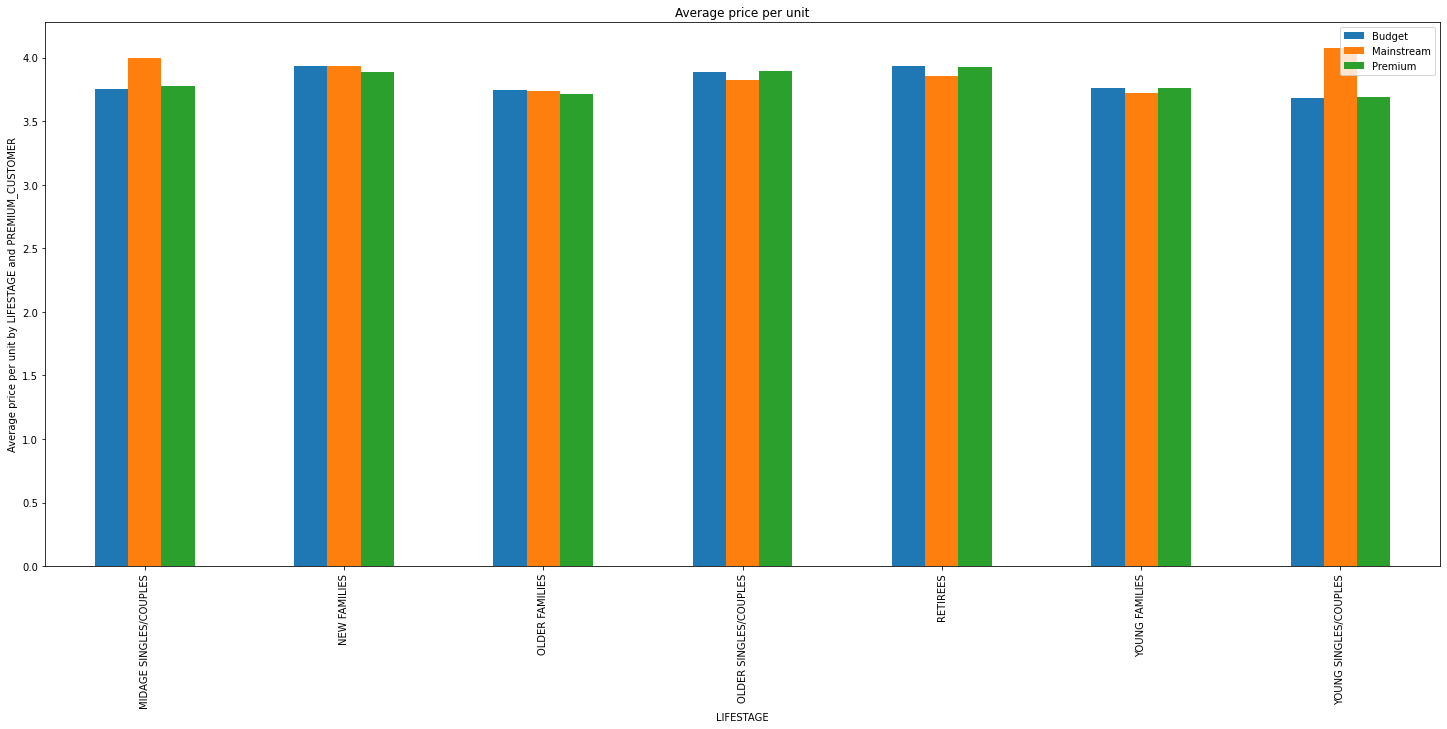

In [122]:
# Visualise 

avg_price_per_unitPlot = mergedData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / mergedData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_price_per_unitPlot.unstack().plot(kind = 'bar', figsize = (25, 10), title = 'Average price per unit')
plt.ylabel('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 1)

Mainstream midage and young singles and couples are more willing to pay more per 
packet of chips compared to their budget and premium counterparts. This may be due 
to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and 
couples buying chips compared to their mainstream counterparts.

In [123]:
# Perform an independent t-test between mainstream vs premium and budget midage 
# and young singles and couples to see if the difference is significant.

# Create a new column PRICE PER UNIT
mergedData['PRICE PER UNIT'] = mergedData['TOT_SALES'] / mergedData['PROD_QTY']


mergedData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE PER UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


In [126]:
mainstream = mergedData.loc[(mergedData['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (mergedData['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (mergedData['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE PER UNIT']
non_mainstream = mergedData.loc[(mergedData['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (mergedData['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (mergedData['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE PER UNIT']

Text(0.5, 0, 'Price per Unit')

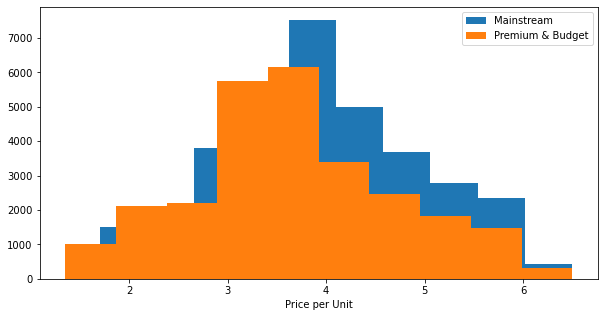

In [127]:
# Visualization to compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(non_mainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [132]:
avg_mainstream = round(np.mean(mainstream), 2)
avg_non_mainstream = round(np.mean(non_mainstream), 2)


if avg_mainstream > avg_non_mainstream:
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream customers have higher average price per unit. 


In [134]:
# Perform t-test 
from scipy.stats import ttest_ind

ttest_ind(mainstream, non_mainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [138]:
# Deep dive into Mainstream, young singles/couples
specific_segment = mergedData.loc[(mergedData['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (mergedData['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
non_specific_segment = mergedData.loc[(mergedData['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (mergedData['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
specific_segment.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE PER UNIT
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snagsauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrbspce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [139]:
non_specific_segment.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE PER UNIT
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,Ccs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00


In [145]:

# Target Segment
specific_segment_brand = specific_segment.loc[:, ['BRAND', 'PROD_QTY']]
specific_segment_brandSum = specific_segment_brand['PROD_QTY'].sum()
specific_segment_brand['Target Brand Affinity'] = specific_segment_brand['PROD_QTY'] / specific_segment_brandSum
specific_segment_brand = pd.DataFrame(specific_segment_brand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
non_specific_segment_brand = non_specific_segment.loc[:, ['BRAND', 'PROD_QTY']]
non_specific_segment_brandSum = non_specific_segment_brand['PROD_QTY'].sum()
non_specific_segment_brand['Non-Target Brand Affinity'] = non_specific_segment_brand['PROD_QTY'] / non_specific_segment_brandSum
non_specific_segment_brand = pd.DataFrame(non_specific_segment_brand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

# Merge the two dataframes together

brand_proportions = pd.merge(specific_segment_brand, non_specific_segment_brand, left_index = True, right_index = True)
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


From the table above it can be deduced that the brand Tyrrells chips is more likely to be purchased compared to other brands by Mainstream young singles/couples.

In [148]:
# Target segment 
specific_segment_Size = specific_segment.loc[:, ['PACK_WEIGHT', 'PROD_QTY']]
specific_segment_SizeSum = specific_segment_Size['PROD_QTY'].sum()
specific_segment_Size['Target Pack Affinity'] = specific_segment_Size['PROD_QTY'] / specific_segment_SizeSum
specific_segment_Size = pd.DataFrame(specific_segment_Size.groupby('PACK_WEIGHT')['Target Pack Affinity'].sum())

# Non-target segment
non_specific_segment_Size = non_specific_segment.loc[:, ['PACK_WEIGHT', 'PROD_QTY']]
non_specific_segment_SizeSum = non_specific_segment_Size['PROD_QTY'].sum()
non_specific_segment_Size['Non-Target Pack Affinity'] = non_specific_segment_Size['PROD_QTY'] / non_specific_segment_SizeSum
non_specific_segment_Size = pd.DataFrame(non_specific_segment_Size.groupby('PACK_WEIGHT')['Non-Target Pack Affinity'].sum())

# Merge the two dataframes together

pack_proportions = pd.merge(specific_segment_Size, non_specific_segment_Size, left_index = True, right_index = True)
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_WEIGHT,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


From the table above, it can be deduced that Mainstream young singles/couples are likely to purchase more of the pack weight 270g compared to other pack weight.

# Conclusion
Budget, OLDER FAMILIES, and Mainstream, YOUNG SINGLES AND COUPLES) sold the most (Mainstream, RETIREES).

There are more clients in the (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) sectors, which is why we found Mainstream.

The average price of a bag of chips is higher for mainstream, young singles, and couples than for premium and budget chips.
They're also more inclined than the general public to buy "Tyrrells" and "270g" pack sizes.